In [1]:
# !pip3 install sklearn
# !pip3 install seaborn
# !pip3 install statsmodels --upgrade

In [2]:
# !pip3 lists

In [3]:
# !conda install sklearn
# !conda install git+https://github.com/statsmodels/statsmodels
# !conda install statsmodels --upgrade

In [4]:
# !conda list

In [5]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter

# from sklearn.datasets import load_boston
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

## Purpose
(1) 請問每個地區預測房價是多少?
(2) 什麼因素會影響房價

# 1. import data

### <span style="color:#3498DB">Point: 了解資料形式</span>

該數據收集於1978年，506個樣本代表波士頓各個郊區房屋，14個特徵的信息。

In [ ]:
dataset = pd.read_csv('BostonHousing.csv', sep=',', encoding='UTF-8')
dataset.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [7]:
# boston_dataset = load_boston()
# dataset = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
# dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [8]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### <span style="color:#3498DB">Point: 請了解變數定義</span>

### <span style="color:#3498DB">Point: 確認預測目標Y </span>

In [9]:
# dataset['MEDV'] = boston_dataset.target

# 2. Data preprocessing

In [10]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
dataset.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

## 標準化

* 當數據集中的不同特徵之間的尺度差異很大時，擬合的線性迴歸模型可能會受到影響，因為較大的特徵尺度可能會支配著較小的特徵尺度。
* 在這種情況下，標準化可以幫助線性迴歸模型更好地捕捉特徵之間的關係，提高模型的準確性和穩定性。
* 如果特徵之間的尺度差異較小，則標準化可能不是必要的。在這種情況下，可以直接使用原始數據進行線性迴歸建模。
* 在某些情況下，標準化可能會導致特徵之間的相關性變弱，因此需要根據具體的數據集和問題來決定是否需要進行標準化。

In [12]:
from sklearn import preprocessing
#建立MinMaxScaler物件
minmax = preprocessing.MinMaxScaler()
# 資料標準化
x_minmax = minmax.fit_transform(dataset[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']])

In [13]:
x_minmax= pd.DataFrame(x_minmax, columns=['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 
                                          'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT'])

In [14]:
res_minmax = pd.concat([x_minmax.reset_index(drop=True), dataset['CHAS']], axis=1)
res_minmax

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS
0,0.000000,0.18,0.067815,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.0
1,0.000236,0.00,0.242302,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.0
2,0.000236,0.00,0.242302,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.0
3,0.000293,0.00,0.063050,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.0
4,0.000705,0.00,0.063050,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095,0.0
502,0.000438,0.00,0.420455,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,0.0
503,0.000612,0.00,0.420455,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,0.0
504,0.001161,0.00,0.420455,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,0.0


## 設定特徵和標籤

In [15]:
# X = res_minmax.iloc[:, 0:13].values
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values.reshape(-1,1) # 轉換成1個column

In [16]:
# 分割訓練和測試
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [17]:
print(f"Shape of X_train:{X_train.shape}")
print(f"Shape of X_test:{X_test.shape}")
print(f"Shape of y_train:{y_train.shape}")
print(f"Shape of y_test{y_test.shape}")

Shape of X_train:(354, 13)
Shape of X_test:(152, 13)
Shape of y_train:(354, 1)
Shape of y_test(152, 1)


# 3. Descriptive statistics

### <span style="color:#3498DB">Point: 請確認是否有NA</span>

In [18]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### <span style="color:#3498DB">Point: 請確認各變數的基礎統計量</span>

In [19]:
dataset.describe() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [20]:
dataset.sort_values(by=['CRIM'], ascending=False)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
380,88.97620,0.0,18.10,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21,10.4
418,73.53410,0.0,18.10,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62,8.8
405,67.92080,0.0,18.10,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0
410,51.13580,0.0,18.10,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0
414,45.74610,0.0,18.10,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,0.01311,90.0,1.22,0.0,0.403,7.249,21.9,8.6966,5.0,226.0,17.9,395.93,4.81,35.4
341,0.01301,35.0,1.52,0.0,0.442,7.241,49.3,7.0379,1.0,284.0,15.5,394.74,5.49,32.7
285,0.01096,55.0,2.25,0.0,0.389,6.453,31.9,7.3073,1.0,300.0,15.3,394.72,8.23,22.0
284,0.00906,90.0,2.97,0.0,0.400,7.088,20.8,7.3073,1.0,285.0,15.3,394.72,7.85,32.2


### <span style="color:#3498DB">Point: 請觀察各X與Y的關係</span>

In [21]:
dataset.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

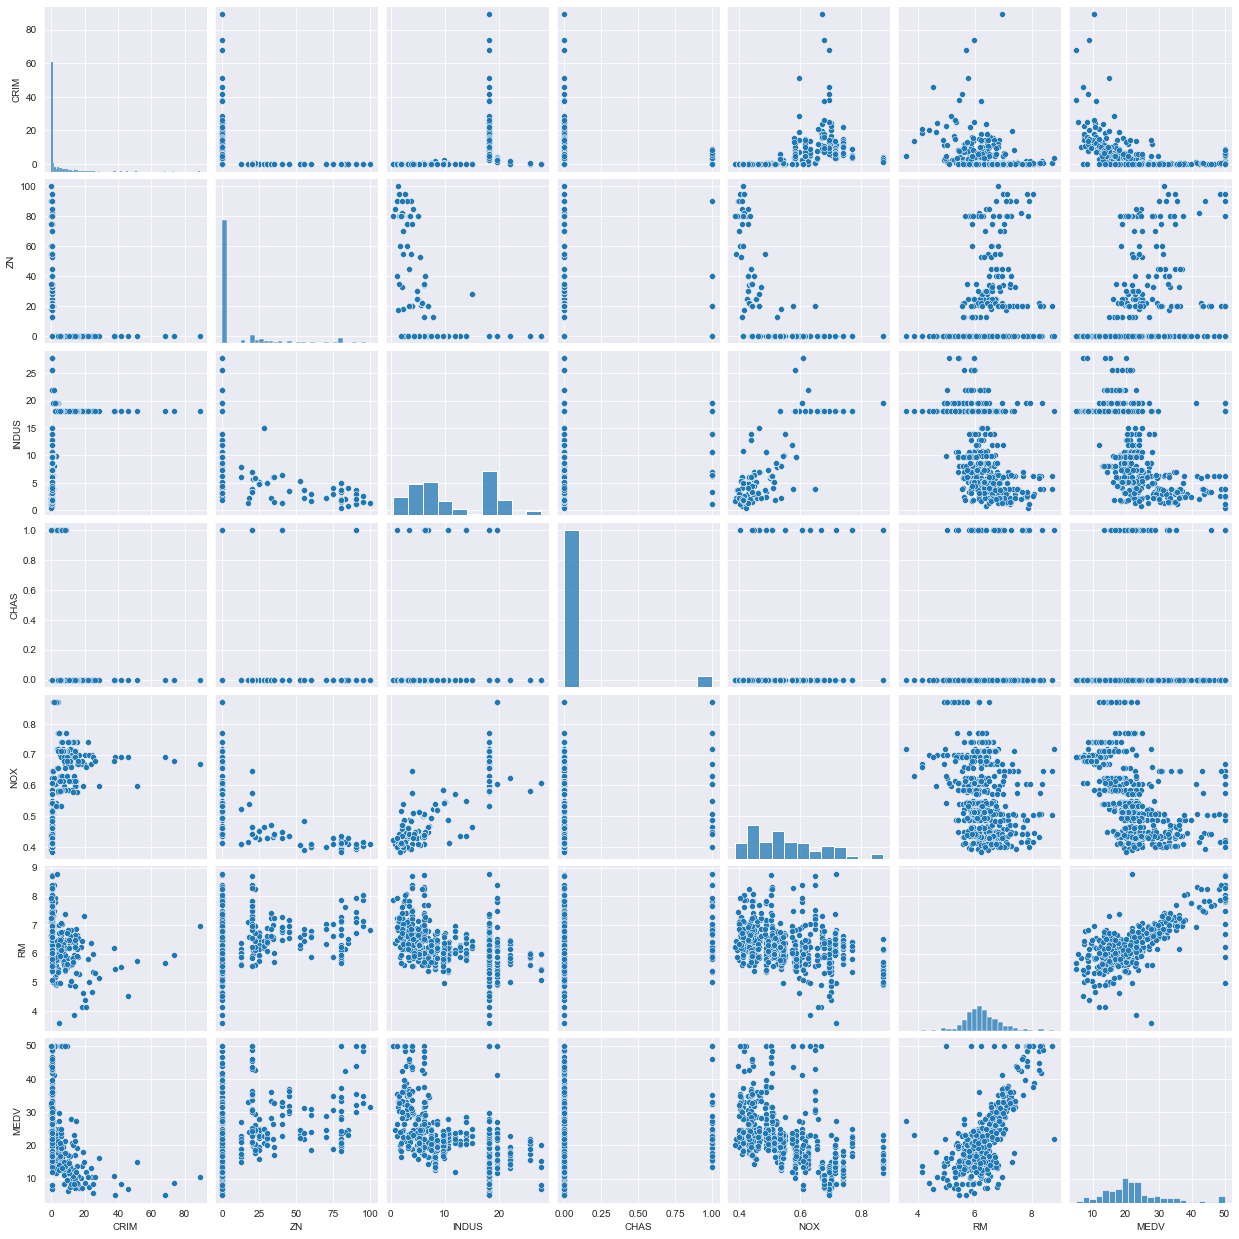

In [22]:
sns.pairplot(dataset[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'MEDV']])

# CRIM：城鎮的人均犯罪率
# ZN：大於25,000平方英尺的地塊的住宅用地比例。
# INDUS：每個鎮的非零售業務英畝的比例。
# CHAS：查爾斯河虛擬變量（如果環河，則等於1；否則等於0）
# NOX：一氧化氮的濃度（百萬分之幾）
# RM：每個住宅的平均房間數
# MEDV：自有住房的中位數價值(單位：1000美元)

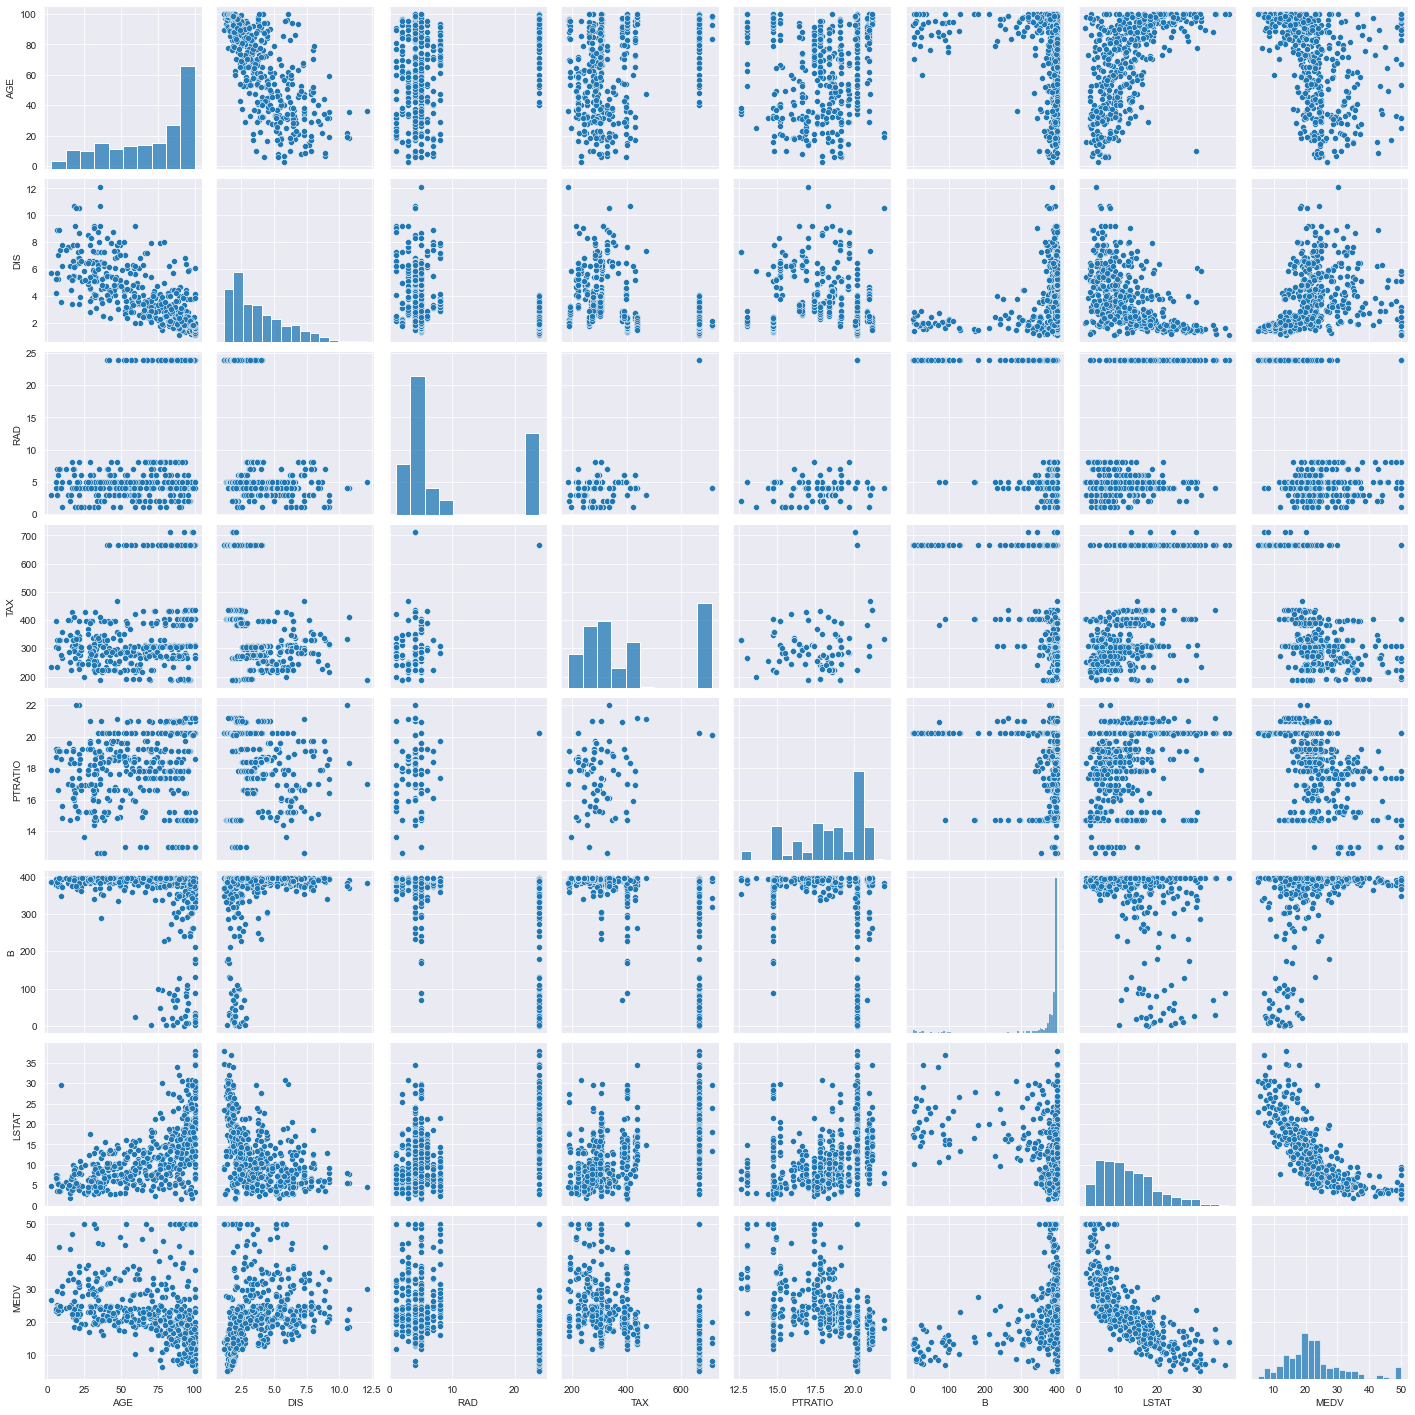

In [23]:
sns.pairplot(dataset[['AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT', 'MEDV']])
# AGE：1940年之前建造的自有住房的比例
# DIS：到五個波士頓就業中心的加權距離
# RAD：徑向公路通達性的指標
# TAX：每$ 10,000的全值財產稅率
# PTRATIO：各鎮的師生比率
# B：計算方法為1000（Bk-0.63）²，其中Bk是按城鎮劃分的非裔美國人的比例
# LSTAT：底層人口的百分比
# MEDV：自有住房的中位數價值(單位：1000美元)

# 4. Correlation
### <span style="color:#3498DB">Point1: 請觀察各變數之間的關係</span>
### <span style="color:#3498DB">Point2: 請判斷各變數之間是否有共線關係</span>

<AxesSubplot:>

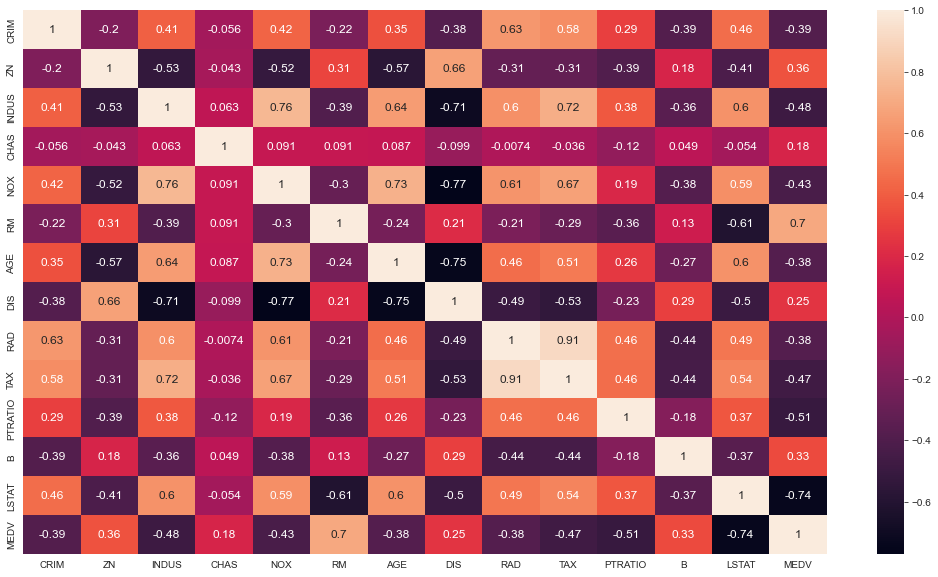

In [24]:
corrmat = dataset.corr()
fig, ax = plt.subplots(figsize = (18, 10))
sns.heatmap(corrmat, annot = True, annot_kws={'size': 12})

# 5. Modeling

## 5-1 Linear Regression (PPT 1.1 & 1.2)

In [25]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

### <span style="color:#3498DB">Point: 請觀察模型是否穩定</span>

In [26]:
from sklearn.metrics import r2_score

# R2 score，即決定係數，反映Y的全部變異能通過迴歸關係被所有X解釋的比例。
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# RMSE一般指均方根誤差(標準誤差)，可衡量預測值和實際值之間的平均差異，藉此估計預測模型預測目標值的準確度
rmse_train = (np.sqrt(mean_squared_error(y_train, y_pred_linear_train)))
rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))

print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_train)
print("RMSE: ", rmse_test)

R2_score (train):  0.7435787589010061
R2_score (test):  0.7133593313710349
RMSE:  4.758519491311492
RMSE:  4.647279745724213


### <span style="color:#3498DB">Point: 請找出顯著與不顯著的變數</span>

In [27]:
import statsmodels.api as sm
from scipy import stats

In [28]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2).fit()
print(est.summary())
# P  < .05, P  < .01,P  < .001

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 09 Jun 2023   Prob (F-statistic):          6.72e-135
Time:                        13:52:01   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### <span style="color:#3498DB">Test: 請將不顯著的變數與您覺得可能具有共線性的變數進行處理，再次跑迴歸，並觀察各類檢測數值是否有優化</span>

### <span style="color:#3498DB">Point: 預測結果</span>

In [30]:
to_be_predicted = np.array([
    [2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
       6.4300e+00, 5.8700e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
       1.8700e+01, 3.9412e+02, 5.2100e+00]
])
predicted_price = regressor_linear.predict(to_be_predicted)

In [31]:
predicted_price

array([[25.21778966]])

---

## 5-2 Polynomial regression (PPT 1.3)

In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly, y_train)

LinearRegression()

### <span style="color:#3498DB">Point: 請比較Linear Regression和Polynomial regression的差異，如兩個模型之間的穩定度及誤差 </span>
### <span style="color:#3498DB">Question: 你會選則哪個模型？</span>

In [33]:
y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(X_train))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)

y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(X_test))
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

rmse_train = (np.sqrt(mean_squared_error(y_train, y_pred_poly2_train)))
rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred_poly2_test)))

print('R2_score (train): ', r2_score_poly2_train)
print('R2_score (test): ', r2_score_poly2_test)
print("RMSE: ", rmse_train)
print("RMSE: ", rmse_test)

R2_score (train):  0.930655848796675
R2_score (test):  0.7665134387957439
RMSE:  2.47457016179314
RMSE:  4.194313190520383


### <span style="color:#3498DB">Point: 預測結果</span>

In [34]:
to_be_predicted = np.array([
    [2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
       6.4300e+00, 5.8700e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
       1.8700e+01, 3.9412e+02, 5.2100e+00]
])
predicted_price = regressor_poly2.predict(poly_reg.fit_transform(to_be_predicted))
predicted_price

array([[25.73197281]])

## 5-3 Lasso regression (PPT 1.4)

alpha : 懲罰度(λ):通常介於1~10 之間

In [35]:
dataset.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [36]:
lasso = Lasso(alpha = 0.5) # , positive=True
lasso.fit(X_train,y_train)

y_pred_lasso_train = lasso.predict(X_train)
r2_score_lasso_train = lasso.score(X_train, y_train)

y_pred_lasso_test = lasso.predict(X_test)
r2_score_lasso_test = lasso.score(X_test, y_test)

rmse_lasso_train = (np.sqrt(mean_squared_error(y_train, y_pred_lasso_train)))
rmse_lasso_test = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))

print("coef：")
for i, j in zip(dataset.columns, lasso.coef_):
    print(i, j)

coef：
CRIM -0.08454584267236803
ZN 0.057348734005538096
INDUS -0.02201747390322905
CHAS 0.0
NOX -0.0
RM 2.691331477477578
AGE -0.002676564538996003
DIS -1.012340257094364
RAD 0.34695997401540485
TAX -0.01997737196787337
PTRATIO -0.7391766442904697
B 0.008768272068121096
LSTAT -0.5883959924116351


Lasso Regression，使用L1正則化，一些參數的值可能會被壓縮到0，因此coef向量中相應的元素也會為0，代表這些特徵在模型中被認為是不重要的。     
可以進行特徵選擇，提高模型的性能和穩定性。

In [37]:
print("R2_score (train): ",r2_score_lasso_train)
print("R2_score (test):", r2_score_lasso_test)
print("train_RMSE: ", rmse_lasso_train)
print("test_RMSE: ", rmse_lasso_test)

R2_score (train):  0.7206075374495715
R2_score (test): 0.6989614674967295
train_RMSE:  4.967091912638201
test_RMSE:  4.762565437136071


## 5-4 Ridge regression (PPT 1.4)

In [38]:
ridgeReg = Ridge(alpha=0.5)

ridgeReg.fit(X_train, y_train)

y_pred_ridge_train = ridgeReg.predict(X_train)
r2_score_ridge_train = ridgeReg.score(X_train, y_train)

y_pred_ridge_test = ridgeReg.predict(X_test)
r2_score_ridge_test = ridgeReg.score(X_test, y_test)

rmse_ridge_train = (np.sqrt(mean_squared_error(y_train, y_pred_ridge_train)))
rmse_ridge_test = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))

print("coef：")
for i, j in zip(dataset.columns, ridgeReg.coef_[0]):
    print(i, j)

coef：
CRIM -0.11252724161063932
ZN 0.0518165221634688
INDUS 0.001429657891224273
CHAS 0.6477735786054486
NOX -13.104651941387331
RM 4.0607611905580505
AGE -0.010356843673806508
DIS -1.466530181369046
RAD 0.3611602864194432
TAX -0.01737953735044395
PTRATIO -0.9152729737921802
B 0.008011621423099885
LSTAT -0.46659450612897346


Ridge Regression使用L2正則化來限制模型參數的大小，從而降低模型的複雜度並避免過度擬合。
L2正則化不會將參數壓縮到0，因此coef向量中的每個元素都對模型的預測有貢獻。

In [39]:
print("R2_score (train): ",r2_score_ridge_train)
print("R2_score (test):", r2_score_ridge_test)
print("train_RMSE: ", rmse_ridge_train)
print("test_RMSE: ", rmse_ridge_test)

R2_score (train):  0.7423446423668625
R2_score (test): 0.713648106881377
train_RMSE:  4.769956762587442
test_RMSE:  4.644938209959274
